<a href="https://colab.research.google.com/github/urazalinuraliev/My_mr_clean.python/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import re # module for reguler expressions
import pandas as pd 
import matplotlib.pyplot as plt
import bs4 as BeautifulSoup 
import seaborn as sns



In [ ]:
url = ("https://en.wikipedia.org/w/api.php")
dat = requests.get(url, params= {"action":"query", "prop":"extracts", "titles":"Ozone_layer", "format":"json"})
data = dat.json()
data

In [ ]:
my_data = data["query"]['pages']['22834']['extract']

In [ ]:
def cleanhtml(raw_html):
  html = re.compile('<.*?>') # compile() funksiyasi belgilangan manbani kod obyekti sifatida qaytaradi, bajarishga tayyor qilip beradi
  clean = re.sub(html,'', raw_html)
  return clean

In [ ]:
no_html_text = cleanhtml(my_data)
no_html_text 


In [ ]:
def merge_contents(data):
  splitted_text = re.split("\. |, |\.|\n| |-|\'", data)
  
  return splitted_text 
merge_content = merge_contents(no_html_text)
merge_content

In [ ]:
def tokenize(content):
  special_char_removed = [word for  word in content if word.isalnum()]      # !@#$%^&*()_, 

  num_removed = [word for word in special_char_removed if not word.isdigit()] # Demak, agar satr o'nlik belgilar bilan birga ushbu belgilarni o'z ichiga olsa, isdigit()qaytaradiTo'g'ri.
  return num_removed
collection = tokenize(merge_content)
collection

In [ ]:
def lower_collection(collection):
    return [word.lower() for word in collection] 

plain_text = lower_collection(collection)


In [ ]:
def count_frequency(collection):
  frequency = {}
  for word in collection:
      if word in frequency:
          frequency[word] += 1
      else :
          frequency[word] = 1
  return frequency 
freq_of_words = count_frequency(plain_text)

In [ ]:
freq_of_words = {k:v for k,v in sorted(freq_of_words.items(), key=lambda item: item[1], reverse=True)} # lug'atni tushunish. dictionary comperhension.
  

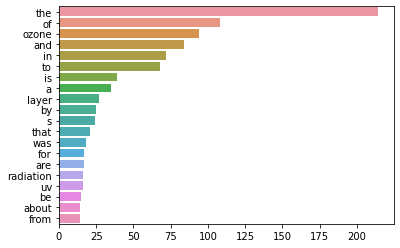

In [ ]:
xx = [v for k,v in freq_of_words.items()]
yy = [k for k,v in freq_of_words.items()]
sns.barplot(x=xx[0:20], y=yy[0:20])

In [ ]:
stop_words = ['the', 'of', 'and', 'in', 'to', 'is', 'a', 'an',
              'by', 'that', 'for', 'was', 'were', 'are', 'from',
              'at', 'it', 'as', 'be', 'these', 'on', 'with', 'this',
              'have', 'has', 'other', 'because', 'can', 'its', 'out', 'about',
              'into', 'or', 'over', 'all', 'most', 'which', 'less', 'while', 'above', 'than', 's', 'a', 'b']

In [ ]:
meanigful_text = [word for word in plain_text if word not in stop_words]  

In [ ]:
freq_of_meaningful_words = count_frequency(meanigful_text)
freq_of_meaningful_words = {k:v for k,v in sorted(freq_of_meaningful_words.items(), 
                                                  key=lambda item: item[1], 
                                                  reverse=True)} 

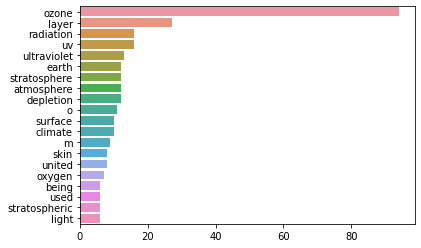

In [ ]:
xxx = [v for k,v in freq_of_meaningful_words.items()]
yyy = [k for k,v in freq_of_meaningful_words.items()]
sns.barplot(x=xxx[0:20], y=yyy[0:20])